In [0]:
#import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from google.colab import files
import io 

In [0]:
uploaded = files.upload()

Saving data2.csv to data2 (1).csv


In [0]:
#Load in CSV file as a pandas dataframe
data = pd.read_csv(io.BytesIO(uploaded['env_data.csv']))

#sanity check
data

,Country code,Country name,SP.POP.TOTL,SP.POP.GROW,NY.GDP.MKTP.CD,NY.GNP.PCAP.CD,EN.CLC.MMDT.C.MIN,EN.CLC.MMDT.C.MAX,EN.CLC.PCAT.C.MIN,EN.CLC.PCAT.C.MAX,EN.CLC.HPPT.MM,EN.CLC.PCPT.MM.MIN,EN.CLC.PCPT.MM.MAX,EN.CLC.PCHW.MIN,EN.CLC.PCHW.MAX,EN.CLC.PCCC.MIN,EN.CLC.PCCC.MAX,AG.LND.EL5M.ZS,EN.POP.EL5M.ZS,EN.URB.MCTY.TL.ZS,SP.URB.TOTL,SP.URB.GROW,EN.CLC.MDAT.ZS,ER.H2O.FWTL.ZS,AG.LND.IRIG.AG.ZS,SI.POV.DDAY,ER.LND.PTLD.ZS,SH.DYN.MORT,SH.STA.MALN.ZS,SH.MLR.INCD,SH.STA.ACSN,SH.H2O.SAFE.ZS,AG.YLD.CREL.KG,EG.ELC.ACCS.ZS,IS.ROD.PAVE.ZS,SH.MED.PHYS.ZS,SH.MED.NUMW.P3,BX.KLT.DINV.WD.GD.ZS,IE.PPI.ENGY.CD,IE.PPI.TELE.CD,IE.PPI.TRAN.CD,IE.PPI.WATR.CD,EN.CLC.DRSK.XQ,IC.BUS.EASE.XQ,IQ.CPA.PUBS.XQ,SE.PRM.CMPT.ZS,SE.ENR.PRSC.FM.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.PP.GD.KD,EN.ATM.CO2E.KT,EN.CLC.GHGR.MT.CE,EN.ATM.METH.KT.CE,EN.ATM.NOXE.KT.CE,EN.ATM.GHGO.KT.CE,EG.USE.PCAP.KG.OE,EG.USE.COMM.GD.PP.KD,EN.CLC.NCOM,EN.CLC.NAMA,EN.CLC.NAPA,EN.CLC.RNET,EN.CLC.HCDM,EN.CLC.ICER,EN.CLC.HJIP,EN.CLC.IERU
0,ABW,Aruba,107489.00,0.82,1.911173e+09,15320.0,NaN,NaN,1.5,2.1,NaN,-121,24,13.7,26.9,-2.9,-3.0,29.57,29.57,NaN,50411.87,0.95,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,1.12,NaN,13.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.81,99.23,21.68,NaN,2288.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,ADO,Andorra,84865.00,1.41,3.712034e+09,41750.0,2.9,12.3,1.8,2.8,973.0,-113,-22,4.0,7.2,-1.8,-1.6,0.00,0.00,NaN,74680.32,0.89,NaN,NaN,NaN,NaN,6.03,3.8,NaN,NaN,100.0,100.0,NaN,NaN,NaN,3.72,4.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.24,104.22,6.53,NaN,539.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2,AFG,Afghanistan,34385069.12,2.83,1.175741e+10,290.0,5.5,19.7,2.3,3.6,327.0,-58,13,3.1,7.0,-1.4,-1.5,0.00,0.00,10.85,8527496.89,4.34,1.06,42.04,4.84,NaN,0.43,149.2,32.9,2428.0,37.0,48.0,2031.3,15.6,29.30,0.21,0.50,2.55,1580000.0,6.000000e+07,NaN,NaN,NaN,160.0,2.4,38.83,62.27,0.03,28.48,814.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0
3,AGO,Angola,19081913.00,2.80,8.439057e+10,3940.0,14.8,28.3,2.1,2.7,1010.0,-89,75,7.0,20.2,-2.2,-2.6,0.21,2.06,25.01,11162918.52,4.35,1.01,0.43,NaN,54.31,12.40,160.5,27.5,21593.0,57.0,50.0,587.7,26.2,10.40,0.08,1.35,11.78,0.0,5.340000e+08,5.300000e+07,NaN,NaN,172.0,2.4,33.01,82.05,1.35,245.29,24370.88,NaN,45408.8,38880.5,19.5,641.11,116.92,NaN,0,0,0,0,0,0,0
4,ALB,Albania,3204285.00,0.36,1.178610e+10,3960.0,6.3,16.5,1.9,2.9,996.0,-147,-44,3.2,6.5,-1.5,-1.4,4.97,8.21,NaN,1538056.32,1.70,5.27,6.83,16.78,0.62,9.79,18.4,6.6,NaN,98.0,97.0,4315.3,NaN,39.00,1.15,4.03,9.41,28000000.0,1.088400e+08,3.080000e+08,0.0,NaN,82.0,3.3,89.63,99.50,1.31,181.76,4176.71,1.53,2406.7,1035.8,62.3,537.83,72.34,11/23/2009 (2nd),0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,YEM,Yemen Rep.,24052515.00,3.06,2.636516e+10,1070.0,18.6,29.1,2.0,2.6,167.0,-24,51,5.6,13.1,-2.0,-2.2,0.56,1.84,9.74,7648699.45,4.90,0.10,161.43,3.27,NaN,0.52,77.0,43.1,1106.0,52.0,62.0,1002.5,39.6,8.70,0.30,0.66,0.49,15790000.0,5.900000e+07,2.200000e+08,NaN,2.25,99.0,2.9,60.91,65.65,1.03,458.83,23384.46,-9.67,6676.7,3250.2,0.0,324.08,142.97,10/29/2001 (1st),0,1,0,0,0,0,0
210,ZAF,South Africa,49991301.00,1.35,3.640000e+11,6090.0,10.6,24.9,1.9,2.7,495.0,-78,33,4.1,10.4,-1.7,-2.0,0.13,0.50,33.60,30844632.10,2.13,1.81,27.86,NaN,17.35,6.86,56.6,10.1,80.0,77.0,91.0,4414.2,75.0,17.30,0.77,4.08,0.43,6000000.0,2.101000e+09,3.483000e+09,0.0,NaN,35.0,NaN,93.18,99.43,8.93,930.31,435877.96,-18.62,63784.5,24048.1,2551.7,2920.54,312.69,12/11/2003 (1st),1,0,1,20,1900,0,0
211,ZAR,Congo Dem. Rep.,65965796.00,2.71,1.314512e+10,180.0,18.4,29.6,2.1,2.4,1543.0,-48,128,6.4,24.7,-2.1,-2.7,0.02,0.04,17.87,23219959.84,4.48,0.02,0.07,NaN,59.22,9.99,169.9,28.2,37400.0,23.0,46.0,788.5,11.1,1.82,0.11,0.53,22.36,NaN,1.740000e+08,0.000000e+00,NaN,NaN,178.0,2.2,55.85,76.82,0.05,151.17,2816.26,-178.78,56445.4,54642.8,0.0

In [0]:
#Replace "#Value!" cells with null values so we can use fillna on them
df = data.replace({'#VALUE!' : np.nan} )
df = df.drop(['EN.CLC.NCOM', 'Country code'], axis =1)
df.fillna(df.median(), inplace=True)


In [0]:
# Drop unnecessary columns in input dataframe
# and columns with CO2 amounts (we will want to predict this)
df = df.drop(['Country name', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PP.GD.KD', 'EG.USE.PCAP.KG.OE'], axis=1) 

#sanity check
df.head()

,SP.POP.TOTL,SP.POP.GROW,NY.GDP.MKTP.CD,NY.GNP.PCAP.CD,EN.CLC.MMDT.C.MIN,EN.CLC.MMDT.C.MAX,EN.CLC.PCAT.C.MIN,EN.CLC.PCAT.C.MAX,EN.CLC.HPPT.MM,EN.CLC.PCPT.MM.MIN,EN.CLC.PCPT.MM.MAX,EN.CLC.PCHW.MIN,EN.CLC.PCHW.MAX,EN.CLC.PCCC.MIN,EN.CLC.PCCC.MAX,AG.LND.EL5M.ZS,EN.POP.EL5M.ZS,EN.URB.MCTY.TL.ZS,SP.URB.TOTL,SP.URB.GROW,EN.CLC.MDAT.ZS,ER.H2O.FWTL.ZS,AG.LND.IRIG.AG.ZS,SI.POV.DDAY,ER.LND.PTLD.ZS,SH.DYN.MORT,SH.STA.MALN.ZS,SH.MLR.INCD,SH.STA.ACSN,SH.H2O.SAFE.ZS,AG.YLD.CREL.KG,EG.ELC.ACCS.ZS,IS.ROD.PAVE.ZS,SH.MED.PHYS.ZS,SH.MED.NUMW.P3,BX.KLT.DINV.WD.GD.ZS,IE.PPI.ENGY.CD,IE.PPI.TELE.CD,IE.PPI.TRAN.CD,IE.PPI.WATR.CD,EN.CLC.DRSK.XQ,IC.BUS.EASE.XQ,IQ.CPA.PUBS.XQ,SE.PRM.CMPT.ZS,SE.ENR.PRSC.FM.ZS,EN.ATM.CO2E.PC,EN.CLC.GHGR.MT.CE,EN.ATM.METH.KT.CE,EN.ATM.NOXE.KT.CE,EN.ATM.GHGO.KT.CE,EG.USE.COMM.GD.PP.KD,EN.CLC.NAMA,EN.CLC.NAPA,EN.CLC.RNET,EN.CLC.HCDM,EN.CLC.ICER,EN.CLC.HJIP,EN.CLC.IERU
0,107489.00,0.82,1.911173e+09,15320.0,17.7,28,1.5,2.1,1111.5,-121,24,13.7,26.9,-2.9,-3.0,29.57,29.57,19.52,50411.87,0.95,0.255,7.98,5.16,15.405,0.10,20.2,10.55,1317.0,85.0,100.0,2683.15,76.6,47.74,1.12,2.84,13.67,55000000.0,71000000.0,120000000.0,0.0,3.25,92.5,3.1,94.81,99.23,21.68,-2.005,12843.0,5794.0,280.3,153.58,0,0,0,0,0,0,0
1,84865.00,1.41,3.712034e+09,41750.0,2.9,12.3,1.8,2.8,973.0,-113,-22,4.0,7.2,-1.8,-1.6,0.00,0.00,19.52,74680.32,0.89,0.255,7.98,5.16,15.405,6.03,3.8,10.55,1317.0,100.0,100.0,2683.15,76.6,47.74,3.72,4.18,2.69,55000000.0,71000000.0,120000000.0,0.0,3.25,92.5,3.1,101.24,104.22,6.53,-2.005,12843.0,5794.0,280.3,153.58,0,0,0,0,0,0,0
2,34385069.12,2.83,1.175741e+10,290.0,5.5,19.7,2.3,3.6,327.0,-58,13,3.1,7.0,-1.4,-1.5,0.00,0.00,10.85,8527496.89,4.34,1.060,42.04,4.84,15.405,0.43,149.2,32.90,2428.0,37.0,48.0,2031.30,15.6,29.30,0.21,0.50,2.55,1580000.0,60000000.0,120000000.0,0.0,3.25,160.0,2.4,38.83,62.27,0.03,-2.005,12843.0,5794.0,280.3,153.58,1,1,0,0,0,0,0
3,19081913.00,2.80,8.439057e+10,3940.0,14.8,28.3,2.1,2.7,1010.0,-89,75,7.0,20.2,-2.2,-2.6,0.21,2.06,25.01,11162918.52,4.35,1.010,0.43,5.16,54.310,12.40,160.5,27.50,21593.0,57.0,50.0,587.70,26.2,10.40,0.08,1.35,11.78,0.0,534000000.0,53000000.0,0.0,3.25,172.0,2.4,33.01,82.05,1.35,-2.005,45408.8,38880.5,19.5,116.92,0,0,0,0,0,0,0
4,3204285.00,0.36,1.178610e+10,3960.0,6.3,16.5,1.9,2.9,996.0,-147,-44,3.2,6.5,-1.5,-1.4,4.97,8.21,19.52,1538056.32,1.70,5.270,6.83,16.78,0.620,9.79,18.4,6.60,1317.0,98.0,97.0,4315.30,76.6,39.00,1.15,4.03,9.41,28000000.0,108840000.0,308000000.0,0.0,3.25,82.0,3.3,89.63,99.50,1.31,1.530,2406.7,1035.8,62.3,72.34,0,0,1,1,0,0,0


In [0]:
# Scale the data using MinMaxScaler

# Initialize scalers
scaler = MinMaxScaler()

mat_train_df = np.matrix(df)

col = list(df.columns)
# Fit input scaler
scaler.fit(df)
x = pd.DataFrame(scaler.transform(mat_train_df),columns = col)


#sanity check
x

,SP.POP.TOTL,SP.POP.GROW,NY.GDP.MKTP.CD,NY.GNP.PCAP.CD,EN.CLC.MMDT.C.MIN,EN.CLC.MMDT.C.MAX,EN.CLC.PCAT.C.MIN,EN.CLC.PCAT.C.MAX,EN.CLC.HPPT.MM,EN.CLC.PCPT.MM.MIN,EN.CLC.PCPT.MM.MAX,EN.CLC.PCHW.MIN,EN.CLC.PCHW.MAX,EN.CLC.PCCC.MIN,EN.CLC.PCCC.MAX,AG.LND.EL5M.ZS,EN.POP.EL5M.ZS,EN.URB.MCTY.TL.ZS,SP.URB.TOTL,SP.URB.GROW,EN.CLC.MDAT.ZS,ER.H2O.FWTL.ZS,AG.LND.IRIG.AG.ZS,SI.POV.DDAY,ER.LND.PTLD.ZS,SH.DYN.MORT,SH.STA.MALN.ZS,SH.MLR.INCD,SH.STA.ACSN,SH.H2O.SAFE.ZS,AG.YLD.CREL.KG,EG.ELC.ACCS.ZS,IS.ROD.PAVE.ZS,SH.MED.PHYS.ZS,SH.MED.NUMW.P3,BX.KLT.DINV.WD.GD.ZS,IE.PPI.ENGY.CD,IE.PPI.TELE.CD,IE.PPI.TRAN.CD,IE.PPI.WATR.CD,EN.CLC.DRSK.XQ,IC.BUS.EASE.XQ,IQ.CPA.PUBS.XQ,SE.PRM.CMPT.ZS,SE.ENR.PRSC.FM.ZS,EN.ATM.CO2E.PC,EN.CLC.GHGR.MT.CE,EN.ATM.METH.KT.CE,EN.ATM.NOXE.KT.CE,EN.ATM.GHGO.KT.CE,EG.USE.COMM.GD.PP.KD,EN.CLC.NAMA,EN.CLC.NAPA,EN.CLC.RNET,EN.CLC.HCDM,EN.CLC.ICER,EN.CLC.HJIP,EN.CLC.IERU
0,0.000079,0.297038,0.000129,0.082896,0.841336,0.754839,0.45,0.304348,0.144917,0.417867,0.097842,0.485830,0.978632,0.045455,0.00,0.2957,0.2957,0.165751,0.000075,0.166826,0.027627,0.001249,0.069862,0.184160,0.001860,0.102751,0.242529,0.027169,0.835165,1.000000,0.259252,0.742857,0.473185,0.023447,0.029338,0.147326,0.001456,0.003491,0.008704,0.0,0.600000,0.502747,0.526316,0.631740,0.602448,0.441770,0.426049,0.009629,0.012381,0.001170,0.123210,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.000062,0.344275,0.000252,0.227322,0.532359,0.248387,0.60,0.608696,0.125991,0.440922,0.031655,0.093117,0.136752,0.545455,0.70,0.0000,0.0000,0.165751,0.000116,0.161106,0.027627,0.001249,0.069862,0.184160,0.112186,0.010668,0.242529,0.027169,1.000000,1.000000,0.259252,0.742857,0.473185,0.078369,0.043378,0.112060,0.001456,0.003491,0.008704,0.0,0.600000,0.502747,0.526316,0.695121,0.668114,0.132776,0.426049,0.009629,0.012381,0.001170,0.123210,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.025692,0.457966,0.000803,0.000765,0.586639,0.487097,0.85,0.956522,0.037715,0.599424,0.082014,0.056680,0.128205,0.727273,0.75,0.0000,0.0000,0.075879,0.014183,0.489990,0.114843,0.006591,0.065529,0.184160,0.008000,0.827063,0.756322,0.050088,0.307692,0.257143,0.190543,0.072527,0.287298,0.004225,0.004820,0.111611,0.000042,0.002951,0.008704,0.0,0.600000,0.873626,0.157895,0.079941,0.116068,0.000204,0.426049,0.009629,0.012381,0.001170,0.123210,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0
3,0.014257,0.455564,0.005778,0.020710,0.780793,0.764516,0.75,0.565217,0.131047,0.510086,0.171223,0.214575,0.692308,0.363636,0.20,0.0021,0.0206,0.222660,0.018569,0.490944,0.109426,0.000064,0.069862,0.649253,0.230698,0.890511,0.632184,0.445446,0.527473,0.285714,0.038378,0.189011,0.096774,0.001479,0.013726,0.141256,0.000000,0.026260,0.003844,0.0,0.600000,0.939560,0.157895,0.022573,0.376365,0.027126,0.426049,0.034058,0.083199,0.000081,0.092387,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.002393,0.260208,0.000805,0.020820,0.603340,0.383871,0.65,0.652174,0.129134,0.342939,0.000000,0.060729,0.106838,0.681818,0.80,0.0497,0.0821,0.165751,0.002551,0.238322,0.570964,0.001068,0.227187,0.007412,0.182140,0.092645,0.151724,0.027169,0.978022,0.957143,0.431291,0.742857,0.385081,0.024081,0.041806,0.133644,0.000741,0.005352,0.022339,0.0,0.600000,0.445055,0.631579,0.580680,0.606001,0.026310,0.427574,0.001801,0.002197,0.000260,0.054904,0.0,0.0,1.0,0.000623,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.017971,0.476381,0.001804,0.005027,0.860125,0.790323,0.70,0.521739,0.015851,0.697406,0.136691,0.157895,0.388889,0.454545,0.40,0.0056,0.0184,0.064372,0.012720,0.543375,0.010834,0.025319,0.044273,0.184160,0.009674,0.421673,0.990805,0.022816,0.472527,0.457143,0.082101,0.336264,0.079637,0.006126,0.006496,0.104994,0.000418,0.002901,0.015957,0.0,0.333333,0.538462,0.421053,0.297585,0.160547,0.020600,0.422744,0.005004,0.006937,0.000000,0.114289,0.0,1.0,0.0,0.000000,0.00

In [0]:
# create target dataframe y which just contains CO2 per capita for each country
y = x['EN.ATM.CO2E.PC']
x = x.drop(['EN.ATM.CO2E.PC'], axis=1)
# Split the data using sklearn train test split
train_x, test_x, train_y, test_y = train_test_split(x, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=99)


In [0]:
train_x

,SP.POP.TOTL,SP.POP.GROW,NY.GDP.MKTP.CD,NY.GNP.PCAP.CD,EN.CLC.MMDT.C.MIN,EN.CLC.MMDT.C.MAX,EN.CLC.PCAT.C.MIN,EN.CLC.PCAT.C.MAX,EN.CLC.HPPT.MM,EN.CLC.PCPT.MM.MIN,EN.CLC.PCPT.MM.MAX,EN.CLC.PCHW.MIN,EN.CLC.PCHW.MAX,EN.CLC.PCCC.MIN,EN.CLC.PCCC.MAX,AG.LND.EL5M.ZS,EN.POP.EL5M.ZS,EN.URB.MCTY.TL.ZS,SP.URB.TOTL,SP.URB.GROW,EN.CLC.MDAT.ZS,ER.H2O.FWTL.ZS,AG.LND.IRIG.AG.ZS,SI.POV.DDAY,ER.LND.PTLD.ZS,SH.DYN.MORT,SH.STA.MALN.ZS,SH.MLR.INCD,SH.STA.ACSN,SH.H2O.SAFE.ZS,AG.YLD.CREL.KG,EG.ELC.ACCS.ZS,IS.ROD.PAVE.ZS,SH.MED.PHYS.ZS,SH.MED.NUMW.P3,BX.KLT.DINV.WD.GD.ZS,IE.PPI.ENGY.CD,IE.PPI.TELE.CD,IE.PPI.TRAN.CD,IE.PPI.WATR.CD,EN.CLC.DRSK.XQ,IC.BUS.EASE.XQ,IQ.CPA.PUBS.XQ,SE.PRM.CMPT.ZS,SE.ENR.PRSC.FM.ZS,EN.CLC.GHGR.MT.CE,EN.ATM.METH.KT.CE,EN.ATM.NOXE.KT.CE,EN.ATM.GHGO.KT.CE,EG.USE.COMM.GD.PP.KD,EN.CLC.NAMA,EN.CLC.NAPA,EN.CLC.RNET,EN.CLC.HCDM,EN.CLC.ICER,EN.CLC.HJIP,EN.CLC.IERU
155,0.005124,0.413931,0.000647,0.006284,0.891441,0.832258,0.40,0.173913,0.422383,0.296830,0.669065,0.558704,0.918803,0.090909,0.05,0.01840,0.0202,0.165751,0.001418,0.278360,0.079090,0.000002,0.069862,0.428213,0.057116,0.330713,0.416092,0.371573,0.395604,0.142857,0.441810,0.742857,0.027218,0.000845,0.004925,0.104384,0.001721,0.000000,0.008704,0.074658,0.600000,0.549451,0.421053,0.223460,0.395842,0.426737,0.009629,0.012381,0.001170,0.123210,1.0,0.0,0.0,0.000623,0.000499,0.00,0.0
58,0.001000,0.227382,0.001277,0.077705,0.503132,0.132258,0.80,0.782609,0.078573,0.861671,0.197122,0.016194,0.034188,0.590909,0.60,0.03350,0.0720,0.165751,0.001541,0.074357,0.000000,0.000191,0.069862,0.005499,0.371163,0.019652,0.242529,0.027169,0.945055,0.971429,0.267405,0.742857,0.281956,0.071821,0.071039,0.129886,0.001456,0.003491,0.008704,0.000000,0.600000,0.126374,0.526316,0.683194,0.627714,0.423882,0.001577,0.001974,0.000166,0.204120,0.0,0.0,1.0,0.000000,0.000000,0.15,0.0
177,0.000391,0.304243,0.000221,0.031530,0.916493,0.822581,0.65,0.652174,0.311561,0.368876,0.217266,0.331984,0.965812,0.272727,0.00,0.03450,0.6822,0.165751,0.000652,0.206864,0.036836,0.000116,0.069862,0.185774,0.212837,0.160584,0.172414,0.014048,0.824176,0.900000,0.371663,0.742857,0.256552,0.009294,0.016555,0.094203,0.001456,0.000000,0.008704,0.000000,0.600000,0.862637,0.526316,0.567275,0.710093,0.427578,0.009629,0.012381,0.001170,0.173860,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0
118,0.023874,0.311449,0.006244,0.015027,0.703549,0.596774,0.75,0.695652,0.040312,0.587896,0.056115,0.076923,0.166667,0.545455,0.50,0.00700,0.0375,0.162952,0.030141,0.228789,0.008667,0.006806,0.062415,0.029886,0.028837,0.188658,0.227586,0.027169,0.659341,0.728571,0.177831,0.967033,0.675101,0.012886,0.008906,0.107789,0.009530,0.055273,0.014506,0.000000,0.533333,0.510989,0.526316,0.489601,0.455586,0.428483,0.007927,0.012423,0.000000,0.089679,1.0,0.0,1.0,0.003741,0.000766,0.00,0.0
64,0.000082,0.259408,0.000018,0.013934,0.841336,0.754839,0.40,0.130435,0.144917,0.521614,0.654676,1.000000,1.000000,0.000000,0.00,0.33370,0.5485,0.165751,0.000033,0.142993,0.146262,0.001249,0.069862,0.372385,0.074977,0.225716,0.242529,0.027169,0.197802,0.914286,0.129291,0.742857,0.168347,0.011618,0.023261,0.114662,0.001456,0.000000,0.008704,0.000000,0.600000,0.763736,0.526316,0.620749,0.639031,0.426049,0.009629,0.012381,0.001170,0.123210,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.021041,0.344275,0.002668,0.006175,0.592902,0.441935,0.70,0.695652,0.021181,0.691643,0.087770,0.036437,0.072650,0.863636,0.85,0.00050,0.0000,0.044781,0.017284,0.220210,0.013001,0.057222,0.069862,0.553258,0.042047,0.278495,0.101149,0.000000,1.000000,0.814286,0.426453,0.742857,0.871976,0.055133,0.112846,0.110198,0.001456,0.031687,0.001813,0.000000,0.600000,0.906593,0.368421,0.600493,0.594947,0.427095,0.029702,0.021391,0.002536,0.560230,0.0,0.0,0.0,0.006858,0.000000,0.00,0.0
168,0.0092

In [0]:
reg1 = LinearRegression()
reg1.fit(train_x, train_y)
prediction1 = reg1.predict(train_x)
prediction2 = reg1.predict(test_x)


In [0]:
train_y

155    0.006119
58     0.277789
177    0.096064
118    0.030797
64     0.011014
         ...   
201    0.092800
168    0.008158
185    0.000612
35     0.107893
129    0.062819
Name: EN.ATM.CO2E.PC, Length: 107, dtype: float64

In [0]:
lr_train = metrics.r2_score(train_y, prediction1)
lr_test = metrics.r2_score(test_y, prediction2)
print(lr_train)
lr_test

0.7548302557339283


-4.732579941798922

In [0]:
#Let's try a different model

from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(max_features=1)

treereg.fit(train_x, train_y)

treepred1 = treereg.predict(train_x)
treepred2 = treereg.predict(test_x)

treescore1 = metrics.r2_score(train_y, treepred1)
treescore2 = metrics.r2_score(test_y, treepred2)
treescore1

0.9999998265294022

In [0]:
x['Country name'] = data['Country name']

pivot = pd.pivot_table(x, index = 'Country name' )
pivot

,AG.LND.EL5M.ZS,AG.LND.IRIG.AG.ZS,AG.YLD.CREL.KG,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.COMM.GD.PP.KD,EN.ATM.GHGO.KT.CE,EN.ATM.METH.KT.CE,EN.ATM.NOXE.KT.CE,EN.CLC.DRSK.XQ,EN.CLC.GHGR.MT.CE,EN.CLC.HCDM,EN.CLC.HJIP,EN.CLC.HPPT.MM,EN.CLC.ICER,EN.CLC.IERU,EN.CLC.MDAT.ZS,EN.CLC.MMDT.C.MAX,EN.CLC.MMDT.C.MIN,EN.CLC.NAMA,EN.CLC.NAPA,EN.CLC.PCAT.C.MAX,EN.CLC.PCAT.C.MIN,EN.CLC.PCCC.MAX,EN.CLC.PCCC.MIN,EN.CLC.PCHW.MAX,EN.CLC.PCHW.MIN,EN.CLC.PCPT.MM.MAX,EN.CLC.PCPT.MM.MIN,EN.CLC.RNET,EN.POP.EL5M.ZS,EN.URB.MCTY.TL.ZS,ER.H2O.FWTL.ZS,ER.LND.PTLD.ZS,IC.BUS.EASE.XQ,IE.PPI.ENGY.CD,IE.PPI.TELE.CD,IE.PPI.TRAN.CD,IE.PPI.WATR.CD,IQ.CPA.PUBS.XQ,IS.ROD.PAVE.ZS,NY.GDP.MKTP.CD,NY.GNP.PCAP.CD,SE.ENR.PRSC.FM.ZS,SE.PRM.CMPT.ZS,SH.DYN.MORT,SH.H2O.SAFE.ZS,SH.MED.NUMW.P3,SH.MED.PHYS.ZS,SH.MLR.INCD,SH.STA.ACSN,SH.STA.MALN.ZS,SI.POV.DDAY,SP.POP.GROW,SP.POP.TOTL,SP.URB.GROW,SP.URB.TOTL
Country name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0000,0.065529,0.190543,0.111611,0.072527,0.123210,0.001170,0.009629,0.012381,0.600000,0.426049,0.000000,0.0,0.037715,0.0,0.0,0.114843,0.487097,0.586639,1.0,1.0,0.956522,0.85,0.75,0.727273,0.128205,0.056680,0.082014,0.599424,0.0,0.0000,0.075879,0.006591,0.008000,0.873626,0.000042,0.002951,0.008704,0.000000,0.157895,0.287298,0.000803,0.000765,0.116068,0.079941,0.827063,0.257143,0.004820,0.004225,0.050088,0.307692,0.756322,0.184160,0.457966,0.025692,0.489990,0.014183
Albania,0.0497,0.227187,0.431291,0.133644,0.742857,0.054904,0.000260,0.001801,0.002197,0.600000,0.427574,0.000623,0.0,0.129134,0.0,0.0,0.570964,0.383871,0.603340,0.0,0.0,0.652174,0.65,0.80,0.681818,0.106838,0.060729,0.000000,0.342939,1.0,0.0821,0.165751,0.001068,0.182140,0.445055,0.000741,0.005352,0.022339,0.000000,0.631579,0.385081,0.000805,0.020820,0.606001,0.580680,0.092645,0.957143,0.041806,0.024081,0.027169,0.978022,0.151724,0.007412,0.260208,0.002393,0.238322,0.002551
Algeria,0.0035,0.028026,0.150763,0.108046,0.992308,0.123168,0.002041,0.040667,0.010463,0.666667,0.423516,0.000000,0.0,0.005193,0.0,0.0,0.004334,0.806452,0.793319,1.0,0.0,0.695652,0.90,0.50,0.590909,0.162393,0.089069,0.069065,0.654179,1.0,0.0353,0.045195,0.008563,0.117581,0.807692,0.061415,0.011655,0.007833,0.492114,0.526316,0.732460,0.010888,0.023497,0.591657,0.589256,0.191465,0.757143,0.020013,0.025349,0.027169,0.945055,0.085057,0.081172,0.349079,0.026501,0.308866,0.039244
American Samoa,0.1789,0.069862,0.259252,0.112060,0.742857,0.123210,0.001170,0.009629,0.012381,0.600000,0.426049,0.000000,0.0,0.144917,0.0,0.0,0.000000,0.754839,0.841336,0.0,0.0,0.086957,0.35,0.10,0.090909,0.914530,0.591093,0.404317,0.651297,0.0,0.0986,0.165751,0.001249,0.005767,0.502747,0.001456,0.000000,0.008704,0.000000,0.526316,0.473185,0.001353,0.023934,0.648901,0.620749,0.102751,0.914286,0.029338,0.016265,0.027169,0.835165,0.242529,0.184160,0.361890,0.000050,0.266921,0.000097
Andorra,0.0000,0.069862,0.259252,0.112060,0.742857,0.123210,0.001170,0.009629,0.012381,0.600000,0.426049,0.000000,0.0,0.125991,0.0,0.0,0.027627,0.248387,0.532359,0.0,0.0,0.608696,0.60,0.70,0.545455,0.136752,0.093117,0.031655,0.440922,0.0,0.0000,0.165751,0.001249,0.112186,0.502747,0.001456,0.003491,0.008704,0.000000,0.526316,0.473185,0.000252,0.227322,0.668114,0.695121,0.010668,1.000000,0.043378,0.078369,0.027169,1.000000,0.242529,0.184160,0.344275,0.000062,0.161106,0.000116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),0.3096,0.069862,0.259252,0.112060,0.742857,0.123210,0.001170,0.009629,0.012381,0.600000,0.426049,0.000000,0.0,0.302268,0.0,0.0,0.027627,0.809677,0.920668,0.0,0.0,0.130435,0.35,0.05,0.000000,0.824786,0.433198,0.126619,0.432277,0.0,0.2194,0.165751,0.001249,0.282791,0.502747,0.001456,0.003491,0.008704,0.000000,0.526316,0.473185,0.000135,0.023934,0.605540,0.620749,0.102751,0.914286,0.029338,0.034643,0.0

In [0]:
# K Means Clustering

sum_sq = {}
for k in range(1,70):
    kmeans = KMeans(n_clusters = k).fit(pivot)
    # Inertia: Sum of distances of samples to their closest cluster center
    sum_sq[k] = kmeans.inertia_
  

In [0]:
sum_sq

{1: 479.9919068302082,
 2: 368.56394574395586,
 3: 301.9280558784409,
 4: 274.37479971031536,
 5: 258.067246746622,
 6: 248.1556658480359,
 7: 237.3515238530884,
 8: 228.60425358235432,
 9: 221.28603128945497,
 10: 215.41947896649353,
 11: 207.8350132843754,
 12: 203.19759494037893,
 13: 194.07158983111316,
 14: 186.1420074709976,
 15: 180.39849854497646,
 16: 180.56192829140423,
 17: 175.64546648051373,
 18: 171.18690225573368,
 19: 166.5866681188669,
 20: 162.90158190806167,
 21: 161.13892951586936,
 22: 156.3059108064611,
 23: 149.53278847583968,
 24: 149.30344969007984,
 25: 146.05768194078303,
 26: 146.05360846080228,
 27: 141.09201308595,
 28: 138.42529040204056,
 29: 132.94419341573806,
 30: 134.11455620467163,
 31: 131.00821079232864,
 32: 124.89291053269002,
 33: 127.27656154156286,
 34: 124.25368850844309,
 35: 121.09813517034348,
 36: 120.90573339628416,
 37: 118.27596557372098,
 38: 116.13484831116462,
 39: 114.68611707292594,
 40: 112.35229690707091,
 41: 111.2964652279283

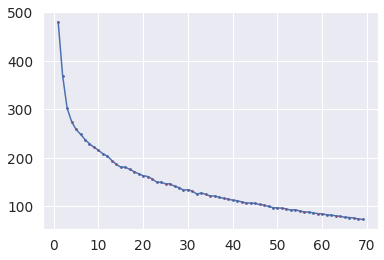

In [0]:
# Plot elbow explained variances
plt.plot(list(sum_sq.keys()),
         list(sum_sq.values()),
        linestyle = '-',
        marker = 'H',
        markersize = 2,
        markerfacecolor = 'red')

In [0]:
# We choose the amount of clusters based on where the elbow is
# This graph doesnt have as clear of an elbow as I've seen before, but it looks like we can justify 15-20 clusters
x = x.drop(['Country name'], axis=1)
kmeans = KMeans(n_clusters=15)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

y_kmeans
# kmeans.cluster_centers_

array([13,  0,  6,  1,  5,  0,  4, 14, 13,  9,  5,  3,  0,  8,  3,  6,  1,
        8,  5, 12, 12,  0,  0,  2, 12,  2, 10, 13,  2, 14,  4,  6,  0,  3,
        4, 10,  6,  6,  6, 12,  9,  1,  7,  9,  2, 12,  5,  5,  3,  1, 13,
        3,  7,  4,  2,  5,  6,  5,  5,  6,  5,  7,  3,  0, 13,  8,  3, 14,
        8, 12,  1,  1,  1,  1,  5, 13,  0,  2, 13,  2,  0,  2,  0,  1,  5,
        7,  0, 10,  3,  0,  0,  0,  4,  5,  7,  4,  3,  0,  1,  0,  6, 11,
       13,  4,  0,  5,  1,  5,  1,  5, 13,  0,  7,  1,  5,  3,  5, 12,  4,
       12,  4,  8, 11, 14,  9, 14,  8,  5,  0,  0,  4, 13,  1,  6,  4,  8,
       13, 13,  0, 13,  8,  8,  7, 13,  3,  0,  1, 13,  3,  0,  5,  2,  9,
        7, 13,  9,  5, 13,  0,  5,  0, 13,  0,  5,  5,  8,  0,  1,  8,  9,
       13,  6,  2, 14,  1,  0, 13,  2,  5,  5,  5,  0, 13,  5,  2,  6,  6,
        5, 14,  0,  1,  7,  2,  4,  5, 11,  1,  8,  0,  0,  0,  0, 13,  2,
       13,  7, 13,  0, 13,  1,  4,  1,  1,  1], dtype=int32)

In [0]:
# List of what countries are in what clusters
clusters = pd.pivot_table(data, values=['SP.POP.TOTL'], index='Country name')
clusters['cluster'] = y_kmeans
print(clusters)

                       SP.POP.TOTL  cluster
Country name                               
Afghanistan            34385069.12       13
Albania                 3204285.00        0
Algeria                35468209.00        6
American Samoa            68421.00        1
Andorra                   84865.00        5
...                            ...      ...
Virgin Islands (U.S.)    109776.00        1
West Bank and Gaza      4152103.00        4
Yemen Rep.             24052515.00        1
Zambia                 12926410.00        1
Zimbabwe               12571455.00        1

[214 rows x 2 columns]


In [0]:
clusters[clusters.cluster==0]

,SP.POP.TOTL,cluster
Country name,,
Albania,3.204285e+06,0
Angola,1.908191e+07,0
Azerbaijan,9.047933e+06,0
Bermuda,6.460100e+04,0
Bhutan,7.259410e+05,0
Cameroon,1.959889e+07,0
Fiji,8.606240e+05,0
Guam,1.798970e+05,0
Guyana,7.544940e+05,0


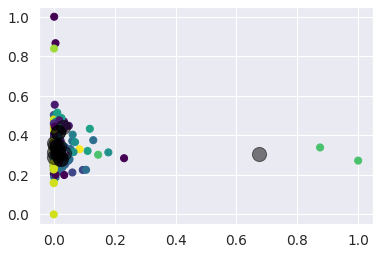

In [0]:
#Plot of clusters (each color should be a cluster)
#Looks like it's difficult for the clustering model to differentiate between the countries
#Some of our variables are probably creating a lot of "noise"

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

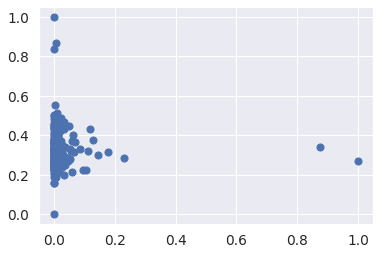

In [0]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s=50)

In [0]:
# Principal Component Analysis (PCA)

pca = PCA()
xpca = pca.fit_transform(x)
pca.components_


array([[-0.00670004,  0.05527156, -0.02340932, ..., -0.00646686,
        -0.02533802, -0.00961861],
       [ 0.0339783 ,  0.0353549 ,  0.01418314, ...,  0.01786595,
         0.01695879,  0.00579468],
       [ 0.05100383, -0.02069814,  0.01169146, ...,  0.03149284,
        -0.00912613, -0.01517961],
       ...,
       [-0.31341291,  0.01337284,  0.45109625, ...,  0.17978954,
        -0.00849745, -0.00599941],
       [ 0.09994589,  0.00367955, -0.20250592, ...,  0.50088495,
        -0.00480219,  0.00206288],
       [-0.54511977,  0.00877841, -0.25920567, ..., -0.16462714,
         0.00301988, -0.00396597]])

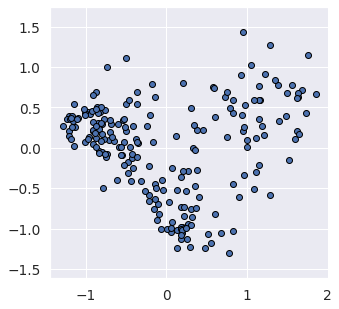

In [0]:
plt.figure(figsize=(5,5))
plt.scatter(xpca[:,0], xpca[:,1],c = "b", edgecolor = "black")
plt.axis('equal');

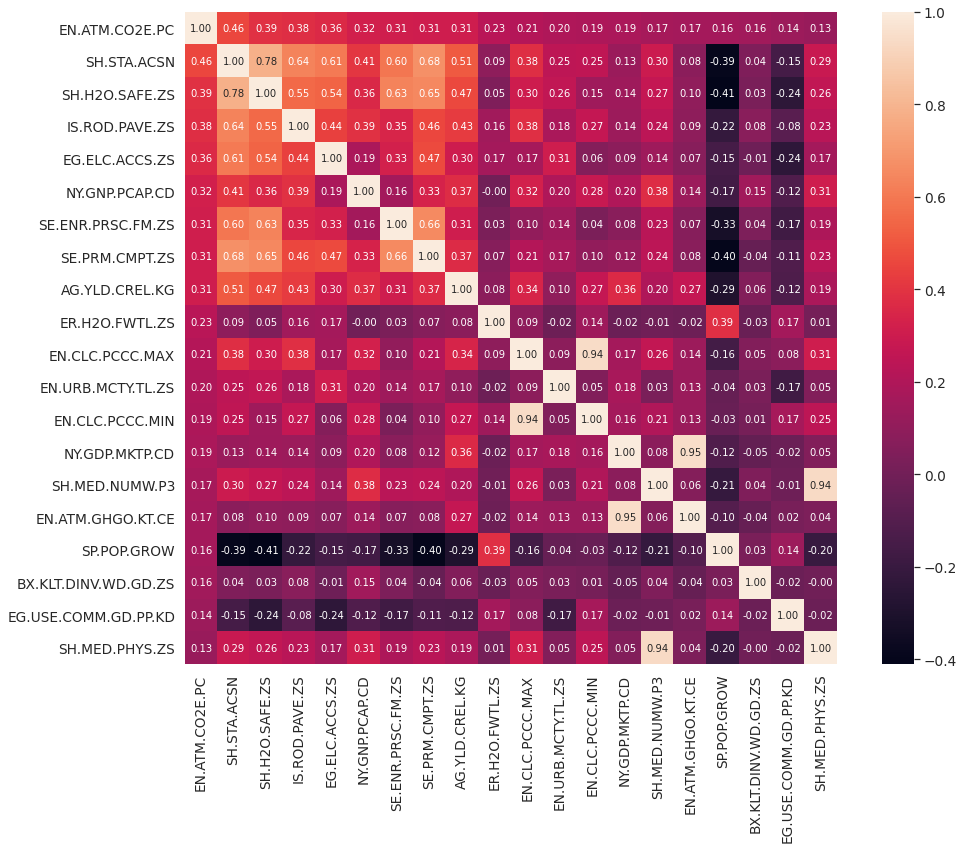

<Figure size 432x288 with 0 Axes>

In [0]:
#CO2 Per Capita correlation matrix
k = 20 #number of variables for heatmap
plt.figure(figsize=(16,12))
corrmat = df.corr()
# picking the top 10 correlated features
cols = corrmat.nlargest(k, 'EN.ATM.CO2E.PC')['EN.ATM.CO2E.PC'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show(hm)
plt.savefig('matrix.jpeg')

In [0]:
# Let's run a model on only the top 10 features
# Initiate our smaller training dataframe
bestfeatures_train = pd.DataFrame()

bestfeatures_train[['SH.STA.ACSN', 'SH.H2O.SAFE.ZS', 'IS.ROD.PAVE.ZS', 'EG.ELC.ACCS.ZS', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 'AG.YLD.CREL.KG', 'ER.H2O.FWTL.ZS', 
              'EN.CLC.PCCC.MAX']] = train_x[['SH.STA.ACSN', 'SH.H2O.SAFE.ZS', 'IS.ROD.PAVE.ZS', 'EG.ELC.ACCS.ZS', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 
              'AG.YLD.CREL.KG', 'ER.H2O.FWTL.ZS', 'EN.CLC.PCCC.MAX']]
bestfeatures_train

,SH.STA.ACSN,SH.H2O.SAFE.ZS,IS.ROD.PAVE.ZS,EG.ELC.ACCS.ZS,NY.GNP.PCAP.CD,SE.ENR.PRSC.FM.ZS,SE.PRM.CMPT.ZS,AG.YLD.CREL.KG,ER.H2O.FWTL.ZS,EN.CLC.PCCC.MAX
155,0.395604,0.142857,0.027218,0.742857,0.006284,0.395842,0.223460,0.441810,0.000002,0.05
58,0.945055,0.971429,0.281956,0.742857,0.077705,0.627714,0.683194,0.267405,0.000191,0.60
177,0.824176,0.900000,0.256552,0.742857,0.031530,0.710093,0.567275,0.371663,0.000116,0.00
118,0.659341,0.728571,0.675101,0.967033,0.015027,0.455586,0.489601,0.177831,0.006806,0.50
64,0.197802,0.914286,0.168347,0.742857,0.013934,0.639031,0.620749,0.129291,0.001249,0.00
...,...,...,...,...,...,...,...,...,...,...
201,1.000000,0.814286,0.871976,0.742857,0.006175,0.594947,0.600493,0.426453,0.057222,0.85
168,0.461538,0.557143,0.286895,0.362637,0.005137,0.553362,0.257664,0.096015,0.001347,0.20
185,0.000000,0.285714,0.000000,0.742857,0.002568,0.133833,0.027107,0.069178,0.000381,0.35
35,0.505495,0.842857,0.531250,0.993407,0.022459,0.676405,0.633613,0.550853,0.003087,0.70


In [0]:
# Same with a testing dataframe
bestfeatures_test = pd.DataFrame()

bestfeatures_test[['SH.STA.ACSN', 'SH.H2O.SAFE.ZS', 'IS.ROD.PAVE.ZS', 'EG.ELC.ACCS.ZS', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 'AG.YLD.CREL.KG', 'ER.H2O.FWTL.ZS', 
              'EN.CLC.PCCC.MAX']] = test_x[['SH.STA.ACSN', 'SH.H2O.SAFE.ZS', 'IS.ROD.PAVE.ZS', 'EG.ELC.ACCS.ZS', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 
              'AG.YLD.CREL.KG', 'ER.H2O.FWTL.ZS', 'EN.CLC.PCCC.MAX']]

bestfeatures_test

,SH.STA.ACSN,SH.H2O.SAFE.ZS,IS.ROD.PAVE.ZS,EG.ELC.ACCS.ZS,NY.GNP.PCAP.CD,SE.ENR.PRSC.FM.ZS,SE.PRM.CMPT.ZS,AG.YLD.CREL.KG,ER.H2O.FWTL.ZS,EN.CLC.PCCC.MAX
92,1.000000,1.000000,1.000000,0.996703,0.147650,0.632583,0.703795,0.311781,0.037937,0.60
43,0.945055,0.957143,0.246774,0.992308,0.034973,0.639558,0.640217,0.373781,0.000370,0.00
98,0.241758,0.414286,0.134274,0.078022,0.003497,0.552046,0.583834,0.103319,0.002069,0.05
101,0.241758,0.442857,0.473185,0.742857,0.010164,0.705224,0.861705,0.259252,0.001249,0.30
103,1.000000,0.971429,0.783266,0.742857,0.107869,0.576128,0.695022,0.739393,0.006158,0.60
...,...,...,...,...,...,...,...,...,...,...
121,0.021978,0.157143,0.108871,0.109890,0.001530,0.571786,0.473731,0.248559,0.000681,0.15
13,0.406593,0.600000,0.097177,0.742857,0.000109,0.516252,0.214096,0.115504,0.000445,0.10
211,0.153846,0.228571,0.010282,0.023077,0.000164,0.307540,0.247708,0.059544,0.000008,0.15
205,0.725275,0.914286,0.471976,0.973626,0.005246,0.523358,0.705964,0.511326,0.003576,0.75


In [0]:
# Another Regression Model
reg2 = LinearRegression()
reg2.fit(bestfeatures_train, train_y)
prediction3 = reg2.predict(bestfeatures_train)
prediction4 = reg2.predict(bestfeatures_test)

In [0]:
#Test the new model
lr_bf_train = metrics.r2_score(train_y, prediction3)
lr_bf_test = metrics.r2_score(test_y, prediction4)
print(lr_bf_train)
lr_bf_test

0.45555309217283557


-0.7750330281618083

In [0]:
# Let's run a model on only the top 20 features
# Initiate our smaller training dataframe
best20features_train = pd.DataFrame()

best20features_train[['SH.STA.ACSN', 'SH.H2O.SAFE.ZS', 'IS.ROD.PAVE.ZS', 'EG.ELC.ACCS.ZS', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 'AG.YLD.CREL.KG', 'ER.H2O.FWTL.ZS', 
              'EN.CLC.PCCC.MAX','EN.URB.MCTY.TL.ZS', 'EN.CLC.PCCC.MIN', 'NY.GDP.MKTP.CD', 'SH.MED.NUMW.P3', 'EN.ATM.GHGO.KT.CE', 'SP.POP.GROW', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 
              'SH.MED.PHYS.ZS']] = train_x[['SH.STA.ACSN', 'SH.H2O.SAFE.ZS', 'IS.ROD.PAVE.ZS', 'EG.ELC.ACCS.ZS', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 
              'AG.YLD.CREL.KG', 'ER.H2O.FWTL.ZS', 'EN.CLC.PCCC.MAX','EN.URB.MCTY.TL.ZS', 'EN.CLC.PCCC.MIN', 'NY.GDP.MKTP.CD', 'SH.MED.NUMW.P3', 'EN.ATM.GHGO.KT.CE', 'SP.POP.GROW', 
              'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'SH.MED.PHYS.ZS']]

best20features_test = pd.DataFrame()

best20features_test[['SH.STA.ACSN', 'SH.H2O.SAFE.ZS', 'IS.ROD.PAVE.ZS', 'EG.ELC.ACCS.ZS', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 'AG.YLD.CREL.KG', 'ER.H2O.FWTL.ZS', 
              'EN.CLC.PCCC.MAX','EN.URB.MCTY.TL.ZS', 'EN.CLC.PCCC.MIN', 'NY.GDP.MKTP.CD', 'SH.MED.NUMW.P3', 'EN.ATM.GHGO.KT.CE', 'SP.POP.GROW', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 
              'SH.MED.PHYS.ZS']] = test_x[['SH.STA.ACSN', 'SH.H2O.SAFE.ZS', 'IS.ROD.PAVE.ZS', 'EG.ELC.ACCS.ZS', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 
              'AG.YLD.CREL.KG', 'ER.H2O.FWTL.ZS', 'EN.CLC.PCCC.MAX','EN.URB.MCTY.TL.ZS', 'EN.CLC.PCCC.MIN', 'NY.GDP.MKTP.CD', 'SH.MED.NUMW.P3', 'EN.ATM.GHGO.KT.CE', 'SP.POP.GROW', 
              'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'SH.MED.PHYS.ZS']]
best20features_train

,SH.STA.ACSN,SH.H2O.SAFE.ZS,IS.ROD.PAVE.ZS,EG.ELC.ACCS.ZS,NY.GNP.PCAP.CD,SE.ENR.PRSC.FM.ZS,SE.PRM.CMPT.ZS,AG.YLD.CREL.KG,ER.H2O.FWTL.ZS,EN.CLC.PCCC.MAX,EN.URB.MCTY.TL.ZS,EN.CLC.PCCC.MIN,NY.GDP.MKTP.CD,SH.MED.NUMW.P3,EN.ATM.GHGO.KT.CE,SP.POP.GROW,BX.KLT.DINV.WD.GD.ZS,EG.USE.COMM.GD.PP.KD,SH.MED.PHYS.ZS
155,0.395604,0.142857,0.027218,0.742857,0.006284,0.395842,0.223460,0.441810,0.000002,0.05,0.165751,0.090909,0.000647,0.004925,0.001170,0.413931,0.104384,0.123210,0.000845
58,0.945055,0.971429,0.281956,0.742857,0.077705,0.627714,0.683194,0.267405,0.000191,0.60,0.165751,0.590909,0.001277,0.071039,0.000166,0.227382,0.129886,0.204120,0.071821
177,0.824176,0.900000,0.256552,0.742857,0.031530,0.710093,0.567275,0.371663,0.000116,0.00,0.165751,0.272727,0.000221,0.016555,0.001170,0.304243,0.094203,0.173860,0.009294
118,0.659341,0.728571,0.675101,0.967033,0.015027,0.455586,0.489601,0.177831,0.006806,0.50,0.162952,0.545455,0.006244,0.008906,0.000000,0.311449,0.107789,0.089679,0.012886
64,0.197802,0.914286,0.168347,0.742857,0.013934,0.639031,0.620749,0.129291,0.001249,0.00,0.165751,0.000000,0.000018,0.023261,0.001170,0.259408,0.114662,0.123210,0.011618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,1.000000,0.814286,0.871976,0.742857,0.006175,0.594947,0.600493,0.426453,0.057222,0.85,0.044781,0.863636,0.002668,0.112846,0.002536,0.344275,0.110198,0.560230,0.055133
168,0.461538,0.557143,0.286895,0.362637,0.005137,0.553362,0.257664,0.096015,0.001347,0.20,0.202135,0.318182,0.000885,0.003982,0.000000,0.444355,0.109298,0.113600,0.001056
185,0.000000,0.285714,0.000000,0.742857,0.002568,0.133833,0.027107,0.069178,0.000381,0.35,0.165751,0.545455,0.000518,0.002515,0.001170,0.441153,0.136502,0.123210,0.000634
35,0.505495,0.842857,0.531250,0.993407,0.022459,0.676405,0.633613,0.550853,0.003087,0.70,0.147300,0.681818,0.402738,0.014040,0.590329,0.272218,0.113538,0.223752,0.029785


In [0]:
reg3 = LinearRegression()
reg3.fit(best20features_train, train_y)
prediction5 = reg3.predict(best20features_train)
prediction6 = reg3.predict(best20features_test)

In [0]:

lr_20_train = metrics.r2_score(train_y, prediction5)
lr_20_test = metrics.r2_score(test_y, prediction6)
print(lr_20_train)
lr_20_test

0.5959373298837405


-1.273320082052507

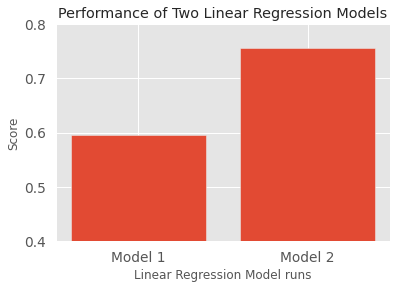

<Figure size 432x288 with 0 Axes>

In [0]:
plt.style.use('ggplot')
x_axis = ['LR1', 'LR2']
scores = [lr_20_train ,lr_train]
labels = ['Model 1', 'Model 2']
x_pos = [i for i, _ in enumerate(x_axis)]
plt.bar(x_pos, scores)
plt.xlabel('Linear Regression Model runs')
plt.ylabel('Score')
plt.ylim(0.4,0.8)
plt.title('Performance of Two Linear Regression Models')
plt.xticks(x_pos, labels)
plt.show()
plt.savefig('wrongscale.png')